In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline 
pd.options.mode.chained_assignment = None

In [6]:
# collisions data
collisions = pd.read_csv('datasets/pd_collisions_datasd.csv')
collisions_dict = pd.read_csv('datasets/pd_collisions_dictionary_datasd.csv')
traffic_counts = pd.read_csv('datasets/traffic_counts_datasd.csv')
traffic_dict = pd.read_csv('datasets/traffic_counts_dictionary_datasd.csv')

# WORKSTATION

Impact:  How important/interesting is the question being asked?

Data Analysis and Visualization: Are the findings presented in an aesthetically pleasing and easy to understand manner? Is the data analysis rigorous and mathematically sound?

Creativity & Innovation: Are there advanced, creative modelling and analysis techniques being used? Are there non-orthodox analysis tools being used?

Presentation: How clearly are the findings presented? Have the ideas been articulated well?

Vision Future plans for the project? Is there a clear idea of how they would like to use their findings? 

# CLEANING THE DATASETS

## Traffic Count

In [15]:
def clean_traffic_count(df,list_columns):
    for i in list_columns:
        if type(df[i][0]) == str:
            df[i] = pd.to_numeric(df[i].str.strip()).fillna(0)
        else: 
            df[i] = df[i].fillna(0)

In [16]:
cleaned_traffic_count = traffic_counts.drop(['id','file_no'],axis=1)

In [17]:
cleaned_traffic_count.dtypes
# all_count and northbound_count are objects when they should be floats; we need to convert them

street_name          object
limits               object
all_count            object
northbound_count     object
southbound_count    float64
eastbound_count     float64
westbound_count     float64
total_count           int64
count_date           object
dtype: object

In [18]:
traffic_count_cols = ['all_count','northbound_count','southbound_count','eastbound_count','westbound_count']
clean_traffic_count(cleaned_traffic_count,traffic_count_cols)

In [19]:
cleaned_traffic_count['count_date']=cleaned_traffic_count['count_date'].apply(pd.to_datetime)

In [20]:
cleaned_traffic_count.head()

,street_name,limits,all_count,northbound_count,southbound_count,eastbound_count,westbound_count,total_count,count_date
0,01 AV,A ST - ASH ST,0.0,18010.0,0.0,0.0,0.0,18010,2007-03-13
1,01 AV,A ST - ASH ST,0.0,20060.0,0.0,0.0,0.0,20060,2010-03-18
2,01 AV,A ST - ASH ST,0.0,19597.0,0.0,0.0,0.0,19597,2013-03-12
3,01 AV,ASH ST - BEECH ST,0.0,2298.0,0.0,0.0,0.0,2298,2012-12-11
4,01 AV,B ST - A ST,0.0,15625.0,0.0,0.0,0.0,15625,2011-09-01


In [26]:
cleaned_traffic_count['street_name'].unique()

array(['01 AV', '02 AV', '03 AV', ..., 'YSABEL CRK RD', 'ZION AV',
       'ZOO PL'], dtype=object)

In [27]:
sum(cleaned_traffic_count['total_count']-(cleaned_traffic_count[traffic_count_cols[0]]
+cleaned_traffic_count[traffic_count_cols[1]]+cleaned_traffic_count[traffic_count_cols[2]]
+cleaned_traffic_count[traffic_count_cols[3]]+cleaned_traffic_count[traffic_count_cols[4]]))
# IT WORKS! All counts add up to total counts

0.0

In [28]:
traffic_dict
# already pretty clean

,Field,Description
0,street_name,The vehicles were counted on this street
1,limits,The vehicles were counted between these cross ...
2,northbound_count,The 24 hour count of northbound vehicles
3,southbound_count,The 24 hour count of southbound vehicles
4,eastbound_count,The 24 hour count of eastbound vehicles
5,westbound_count,The 24 hour count of westbound vehicles
6,total_count,The 24 hour total of all directions of vehicle...
7,count_date,The vehicles were counted on this date


## Collisions

In [29]:
cleaned_collisions = collisions.drop('report_id',axis=1)
cleaned_collisions['hit_run_lvl'].fillna('NEITHER',inplace = True)
cleaned_collisions['date_time'] = cleaned_collisions['date_time'].apply(pd.to_datetime)
cleaned_collisions.head()

,date_time,police_beat,street_no,street_dir,street_name,street_type,cross_st_dir,cross_st_name,cross_st_type,violation_section,violation_type,charge_desc,injured,killed,hit_run_lvl
0,2017-01-01 00:01:00,124,8300,,CAM DEL ORO,,,,,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,MISDEMEANOR
1,2017-01-01 00:01:00,325,8100,,ROYAL GORGE,DRIVE,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,MISDEMEANOR
2,2017-01-01 00:01:00,322,6400,,CRAWFORD,STREET,,,,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,MISDEMEANOR
3,2017-01-01 00:01:00,935,5500,,VALERIO,TRAIL,,,,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,MISDEMEANOR
4,2017-01-01 01:00:00,521,1000,,11TH,AVENUE,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,MISDEMEANOR


In [30]:
cleaned_collisions['street_type'].unique()

array([' ', 'DRIVE', 'STREET', 'TRAIL', 'AVENUE', 'PLACE', 'COURT',
       'ROAD', 'BOULEVARD', 'PARKWAY', 'WAY', 'COVE', 'CIRCLE', 'LANE',
       'HIGHWAY', 'TERRACE', 'PLAZA', 'MALL', 'ROW', 'POINT', 'WALK',
       'PASEO', 'SQUARE', 'RAMP', 'DRIVEWAY', 'KNOLLS', nan, 'LIGHTS'],
      dtype=object)

In [31]:
cleaned_collisions['hit_run_lvl'].value_counts()

NEITHER        12187
MISDEMEANOR    10407
FELONY           114
Name: hit_run_lvl, dtype: int64

# ------------------------

In [34]:
beats = pd.read_csv('datasets/pd_beats_dictionary_datasd.csv')

In [35]:
for i in beats['description']:
    print(i)

Unique identifier
Beat number. Beats roll up into Service Areas, which roll up into Divisions.
Division number. Divisions are divided into Service Areas.
Service Area number. Service Areas are divided into beats.
Beat name


In [40]:
beats = gpd.read_file('datasets/pd_beats_datasd.shp')

In [41]:
beats.shape

(140, 1)

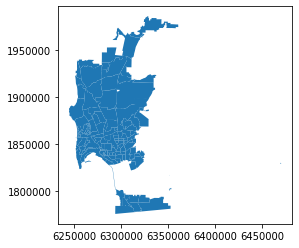

In [43]:
beats.plot()

In [50]:
beats.head()

,geometry
0,"POLYGON ((6269942.126 1876454.880, 6269942.997..."
1,"POLYGON ((6278389.000 1842955.000, 6278678.000..."
2,"POLYGON ((6297474.000 1858581.000, 6297511.000..."
3,"POLYGON ((6311032.697 1874322.529, 6311033.870..."
4,"POLYGON ((6292488.539 1846444.000, 6292486.000..."


In [51]:
cleaned_beats = beats[['beat','name','geometry']]

KeyError: "['beat', 'name'] not in index"

In [52]:
merged_beat = pd.merge(cleaned_beats,beat_ik,left_on='beat'
                       ,right_on='police_beat')[['geometry','police_beat','injured','killed','name']]

NameError: name 'cleaned_beats' is not defined

In [53]:
merged_beat.sort_values('injured',ascending=False).head()

NameError: name 'merged_beat' is not defined

NameError: name 'merged_beat' is not defined

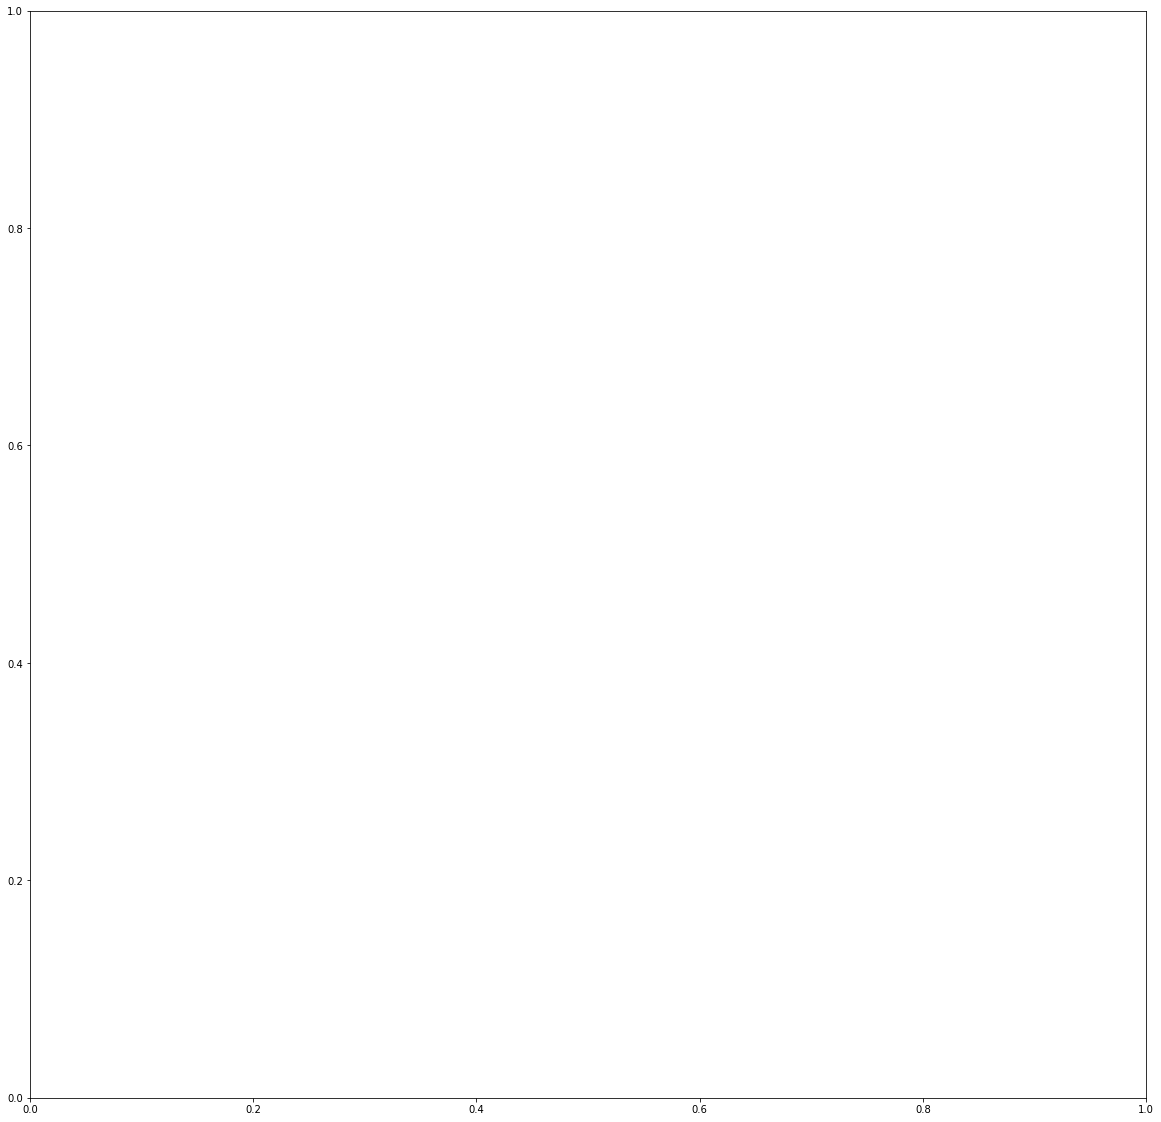

In [54]:
fig, ax = plt.subplots(figsize=(20, 20))
merged_beat.plot(column='injured',ax=ax, legend = True)
#fig.suptitle('Injuries in each Beat', fontsize=20);
plt.savefig('choropleth_injured.png')

In [ ]:
merged_beat.sort_values('killed',ascending=False).head()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
merged_beat.plot(column='killed',ax=ax, legend = True)
plt.savefig('choropleth_killed.png')

In [45]:
potentially_interesting = pd.merge(beats,cleaned_collisions,left_on='beat',right_on='police_beat')

KeyError: 'beat'

# ANALYSIS

QUESTIONS: 
For traffic count: 
What days are worst for traffic?
Which direction is the worst?


## Traffic over time 

In [48]:
roads = gpd.read_file('datasets/roads_datasd.shp')
slim_roads = roads[['geometry','rd30full']]
slim_roads['rd30full'] = slim_roads['rd30full'].str.lower()
slim_roads.head()

KeyError: "['rd30full'] not in index"

In [ ]:
'''
for i in range(0,500,2):
    tester = interesting[interesting['count_date']==array_item[i]]
    array = slim_roads['rd30full'].str.contains('!') 
    for j in tester['street_name']:
        array += slim_roads['rd30full'].str.contains(j)
    test = slim_roads[array]
    fig, ax = plt.subplots(figsize=(10, 10))
    fig.suptitle(str(pd.to_datetime(array_item[i]).date()), fontsize=20)
    slim_roads.plot(color='gray',ax=ax)
    beats.plot(ax=ax)
    test.plot(color='red',ax=ax)
    plt.tight_layout()
    plt.savefig('foo'+str(i)+'.png')
'''